### Data Preparation

In [124]:
# import depenedencies 
# read data from csv file
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

crypto_df = pd.read_csv('crypto_data.csv')
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [125]:
crypto_df = crypto_df.drop('Unnamed: 0', axis=1)
# filter for cryptocurrencies that are currently trading 
trading_crypto = crypto_df[crypto_df['IsTrading'] != False]
# trading_crypto

# drop 'IsTrading' column; all currencies in this dataframe are currently trading
trading_crypto = trading_crypto.drop('IsTrading', axis=1)
trading_crypto

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365Coin,X11,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,PoW,NaN,611000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
1243,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,SHA-256,DPoI,NaN,1000000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [126]:
# drop any rows with missing values
trading_crypto.dropna(inplace=True)
trading_crypto

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [127]:
# filter for cryptocurrencies that have been mined
mined_crypto = trading_crypto.loc[trading_crypto['TotalCoinsMined'] > 0]
# mined_crypto = mined_crypto.drop('TotalCoinsMined', axis=1)
mined_crypto

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [128]:
# drop coin name column
mined_crypto.drop(columns=['CoinName'], inplace=True)
mined_crypto

C:\Users\hmwhi\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [129]:
mined_crypto.shape

(532, 4)

In [130]:
# convert 'Algorithm' & 'ProofType' columns to numeric values
#  get dummy variables for 'Algorithm' & 'ProofType' columns
dummies_df = pd.get_dummies(mined_crypto, prefix=['Algorithm', 'ProofType'], columns=['Algorithm', 'ProofType'])
dummies_df


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The number of columns increased by 94

In [132]:
# scale the dataframe
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dummies_df)

### Dimensionality Reduction 

In [134]:
# use pca to reduce the number of features
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)
crypto_pca = pca.fit_transform(scaled_data)
crypto_pca.shape

(532, 74)

Performing dimensionality reduction with PCA decreased the number of features by 20

In [135]:
# use t-SNE to further reduce the number of features and visualize the results
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=100)
tsne_features = tsne.fit_transform(crypto_pca)
tsne_features.shape

C:\Users\hmwhi\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(532, 2)

t-SNE further reduced the number of features by 72

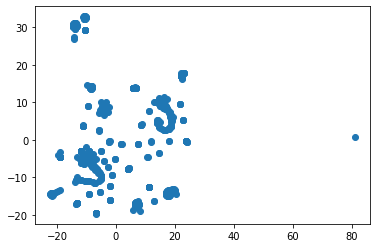

In [136]:
x = tsne_features[:, 0]
y = tsne_features[:, 1]

plt.scatter(x, y)
plt.show()

The resulting cluster is very interesting. There is one large cluster, one small cluster, a significant outlier, as well as two "J-shaped" clusters within the main cluster.